## CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn-data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [5]:
df.totalcharges = df.totalcharges.fillna(0)

In [6]:
df.churn = (df.churn == 'yes').astype(int)

## **Setting up the validation framework**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [10]:
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [11]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [12]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## **EDA**

In [13]:
df_full_train.reset_index(drop = True)

df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [14]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [15]:
numerical = ['tenure', 'monthlycharges', 'totalcharges'] # 3 numerical
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [16]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## **Feature importance: Churn rate and risk ratio**

In [17]:
# Churn rate by female
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [18]:
# By male
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [19]:
# By partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [20]:
# By no partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

Difference of global - group churn
---
if > 0, more likely to churn
if < 0, less likely to churn

Risk ratio:
---
group / global churn rate

if > 1, more likely
if < 1, less likely

In [21]:
churn_partner / global_churn_rate

0.7594724924338315

In [22]:
from IPython.display import display

In [23]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print('\n')


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## **Feature importance: mutual information**

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [26]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [27]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [28]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [29]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## **Feature importance: Correlation**

In [30]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [31]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [32]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [33]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [34]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [35]:
df_full_train[(df_full_train.monthlycharges > 50)].churn.mean()

0.32499341585462205

## **One-hot encoding**

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [114]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [38]:
dv = DictVectorizer(sparse=False)

In [115]:
X_train = dv.fit_transform(train_dicts)


In [116]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## **Logistic Regression**

In [41]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

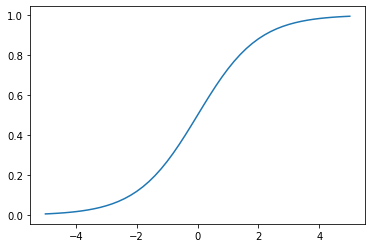

In [42]:
z = np.linspace(-5, 5, 51)
sigmoid(z)
plt.plot(z, sigmoid(z))

In [43]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] + w[j]
    return result

In [44]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] + w[j]
    
    return sigmoid(score)

## **Train logistic regression w/ scikit learn**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Luke Luo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.407, -0.029, -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [50]:
model.intercept_[0]

-0.10908263342997616

In [52]:
# model.predict(X_train) = Hard predictions
model.predict_proba(X_train) # Soft predictions

# Left column = probability of not churning
# Right column = probability of churning

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899646, 0.20432609, 0.21210448, ..., 0.13627263, 0.79979041,
       0.83745656])

In [56]:
churn_decision = y_pred >= .5
churn_decision.astype(int)

[0 0 0 ... 0 1 1]


array([0, 0, 0, ..., 0, 1, 1])

In [57]:
(y_val == churn_decision).mean()

0.8034066713981547

In [58]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [61]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [64]:
df_pred.correct.mean()

0.8034066713981547

## **Model interpretation**

In [66]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.029,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,

In [67]:
small = ['contract', 'tenure', 'monthlycharges']

In [69]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [70]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [71]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [72]:
X_train_small = dv_small.transform(dicts_train_small)

In [73]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [79]:
w0 = model_small.intercept_[0]
w0

-2.476775661814925

In [77]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [78]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [86]:
(-2.47 - 0.949 + 30 * .027 + 24 * -.036)

-3.473

In [87]:
sigmoid(_)

0.030090303318277657

## **Using the model**

In [88]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [90]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [91]:
y_full_train = df_full_train.churn.values

In [92]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [93]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [94]:
X_test = dv.transform(dicts_test)

In [96]:
y_pred = model.predict_proba(X_test)[:,1]

In [97]:
churn_decision = (y_pred >= .5)

In [98]:
(churn_decision == y_test).mean()

0.815471965933286

In [107]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [108]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [109]:
model.predict_proba(X_small)[0, 1]

0.5968852088240952

In [110]:
y_test[-1]

1